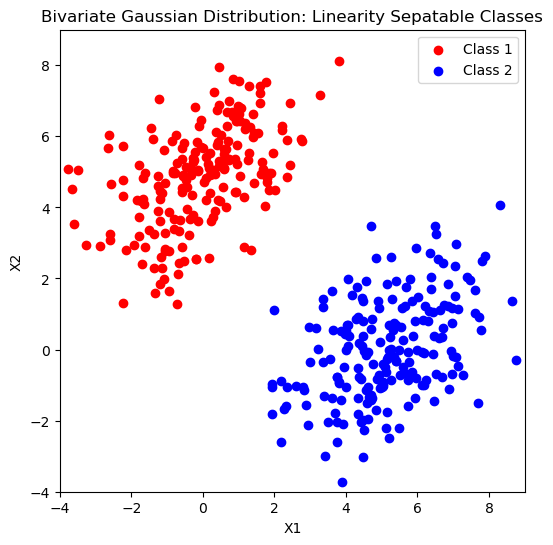

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#Set the number of data points per class
NumDataPerClass = 200

#Define two class means 
m1 = np.array([0, 5]) #Mean of class 1
m2 = np.array([5, 0]) #Mean of class 2

#Define a common covariance matrix for both classes
C = np.array([[2, 1], [1, 2]])

#Perform Cholesky decomposition to transform Gaussian data
A = np.linalg.cholesky(C)

#Generate random Gaussian data
U1 = np.random.randn(NumDataPerClass,2)
U2 = np.random.randn(NumDataPerClass,2)

#Transform the data using covariance matrix and add the mean
X1 = U1 @ A.T + m1
X2 = U2 @ A.T + m2

#Plot the generated data points
plt.figure(figsize = (6, 6))
plt.scatter(X1[:, 0], X1[:, 1], color = 'red', label = 'Class 1')
plt.scatter(X2[:, 0], X2[:, 1], color = 'blue', label = 'Class 2')

#Set plot limlts, labels and title
plt.xlim([-4, 9])
plt.ylim([-4, 9])
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper right')
plt.title('Bivariate Gaussian Distribution: Linearity Sepatable Classes')

#Display the plot
plt.show()

(200, 2) (200,) (200, 2) (200,)
[-1.23853228  0.18064778]
初始准确率: 83.50%
训练集最终准确率: 100.00%
测试集最终准确率: 100.00%


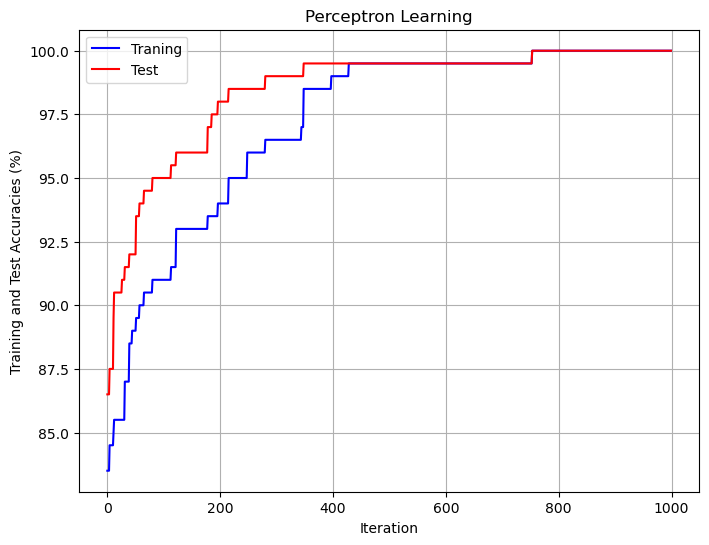

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#Set the number of data points per class
NumDataPerClass = 200

#Define two class means 
m1 = np.array([0, 5]) #Mean of class 1
m2 = np.array([5, 0]) #Mean of class 2

#Define a common covariance matrix for both classes
C = np.array([[2, 1], [1, 2]])

#Perform Cholesky decomposition to transform Gaussian data
A = np.linalg.cholesky(C)

#Generate random Gaussian data
U1 = np.random.randn(NumDataPerClass,2)
U2 = np.random.randn(NumDataPerClass,2)

#Transform the data using covariance matrix and add the mean
X1 = U1 @ A.T + m1
X2 = U2 @ A.T + m2

#Concatenate data from two classes into one array
X = np.concatenate((X1, X2), axis=0)
labelPos = np.ones(NumDataPerClass)  #class 1 label as +1
labelNeg = -1.0 * np.ones(NumDataPerClass)  #class 2 label as -1
y = np.concatenate((labelPos, labelNeg))

# Partitioning the data into training and test sets
rIndex = np.random.permutation(2*NumDataPerClass)
Xr = X[rIndex,]
yr = y[rIndex]

# Training and test sets (half half)
X_train = Xr[0:NumDataPerClass]
y_train = yr[0:NumDataPerClass]
X_test = Xr[NumDataPerClass:2*NumDataPerClass]
y_test = yr[NumDataPerClass:2*NumDataPerClass]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Ntrain = NumDataPerClass;
Ntest = NumDataPerClass;

#Calculating the percentage of correctly classified examples
def PercentCorrect(Inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        OneInput = Inputs[n,:]
        if (targets[n] * np.dot(OneInput, weights) > 0):
            nCorrect +=1
    return 100*nCorrect/N

# Perceptron learning loop
    # Random initialization of weights
w = np.random.randn(2)
print(w)

# Initial Percentage Correct of initial random weights?
# print(f’Initial Percentage Correct: %6.2 f’ %(PercentCorrect(X_train, y_train, w)))

# 初始随机权重下的准确率
print(f'初始准确率: {PercentCorrect(X_train, y_train, w):.2f}%')

# Fixed number of iterations (think of better stopping criterion)
MaxIter=1000

# Learning rate (change this to see convergence changing)
alpha = 0.002

# Space to save answers for plotting
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)

# Main Loop
for iter in range(MaxIter):
    # Select a data item at random
    r = np.floor(np.random.rand()*Ntrain).astype(int)
    x = X_train[r,:]
    
    # If it is misclassified, update weights
    if (y_train[r] * np.dot(x, w) < 0):
        w += alpha * y_train[r] * x
    
    # Evaluate trainign and test performances for plotting
    P_train[iter] = PercentCorrect(X_train, y_train, w);
    P_test[iter] = PercentCorrect(X_test, y_test, w);

# print(’Percentage Correct After Training: %6.2f %6.2f’%(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))
# 最终准确率
print(f'训练集最终准确率: {PercentCorrect(X_train, y_train, w):.2f}%')
print(f'测试集最终准确率: {PercentCorrect(X_test, y_test, w):.2f}%')

# fig, ax = plt.subplots(figsize=(6,4))
# ax.plot(range(MaxIter), P_train, ’b’, label = "Training")
# ax.plot(range(MaxIter), P_test, ’r’, label = "Test")
# ax.grid(True)
# ax.legend()
# ax.set_title(’Perceptron Learning’)
# ax.set_ylabel(’Training and Test Accuracies’, fontsize=14)
# ax.set_xlabel(’Iteration’, fontsize=14)
# plt.savefig(’learningCurves.png’)

# 绘制学习曲线
plt.figure(figsize=(8, 6))
plt.plot(range(MaxIter), P_train, label='Traning', color='blue')
plt.plot(range(MaxIter), P_test, label='Test', color='red')
plt.xlabel('Iteration')
plt.ylabel('Training and Test Accuracies (%)')
plt.title('Perceptron Learning')
plt.grid(True)
plt.legend()
plt.show()


In [14]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# 使用Scikit-learn的感知器模型
model = Perceptron()
model.fit(X_train, y_train)

# 训练集和测试集的准确率
yh_train = model.predict(X_train)
yh_test = model.predict(X_test)

print(f'Scikit-learn 训练集准确率: {accuracy_score(yh_train, y_train) * 100:.2f}%')
print(f'Scikit-learn 测试集准确率: {accuracy_score(yh_test, y_test) * 100:.2f}%')

if accuracy_score(yh_test, y_test) > 0.99:
    print("Boki！")

Scikit-learn 训练集准确率: 100.00%
Scikit-learn 测试集准确率: 100.00%
Boki！
